Roc Auc: 0.60


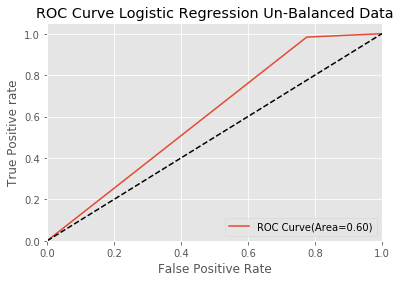

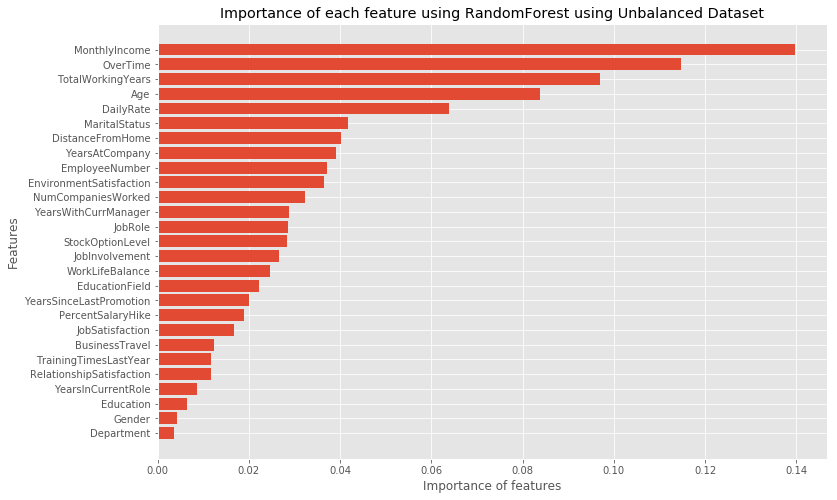

Roc Auc: 0.79


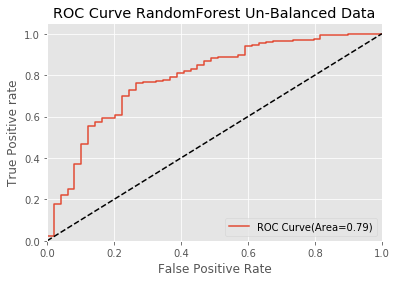

Roc Auc: 0.64


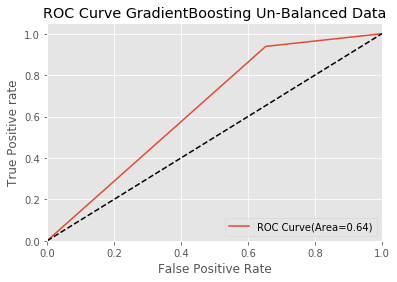

Roc Auc: 0.80


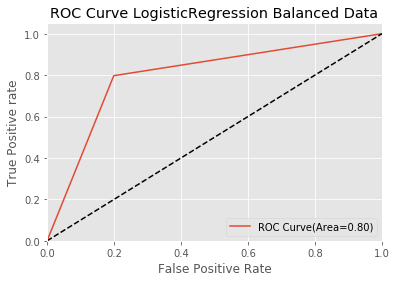

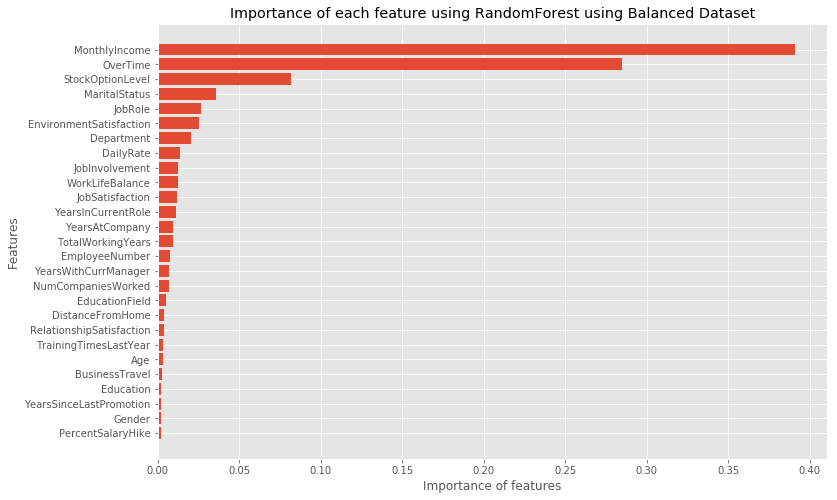

Roc Auc: 0.95


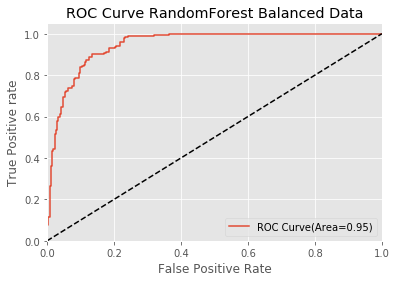

Roc Auc: 0.90


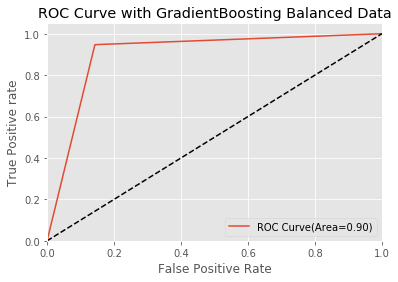

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model as skl_lm
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,BaggingRegressor,GradientBoostingClassifier,GradientBoostingRegressor

from sklearn.metrics import confusion_matrix,classification_report, mean_squared_error
import statsmodels.formula.api as sm
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

plt.style.use('ggplot')

os.chdir(r"F:\DataScience\HRAttritionData")
emp=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

#ALl features extracted on basis of EDA
final_features=["Age", "DailyRate", "DistanceFromHome", "Education", "MonthlyIncome" ,"NumCompaniesWorked",
"PercentSalaryHike","RelationshipSatisfaction",
"StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany",
"YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager",
"EmployeeNumber","EnvironmentSatisfaction","JobInvolvement","JobSatisfaction","BusinessTravel","Department", "EducationField","OverTime","Gender","JobRole","MaritalStatus"]


emp_mod=emp.copy()
emp_mod=emp[final_features]

#Converting character features to numeric
emp_mod["BusinessTravel"] = emp_mod["BusinessTravel"].replace(["Travel_Rarely","Travel_Frequently","Non-Travel"],[0,1,2]);
emp_mod["MaritalStatus"] = emp_mod["MaritalStatus"].replace(["Single","Married","Divorced"],[0,1,2]);
emp_mod["Gender"] = emp_mod["Gender"].replace(["Female","Male"],[0,1]);
emp_mod["Department"] = emp_mod["Department"].replace(["Sales","Research & Development","Human Resources"],[0,1,2]);

emp_mod["EducationField"] = emp_mod["EducationField"].replace(["Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"],[0,1,2,3,4,5]);

emp_mod["OverTime"] = emp_mod["OverTime"].replace(["Yes","No"],[0,1]);

emp_mod["JobRole"] = emp_mod["JobRole"].replace(["Sales Executive","Sales Representative","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Research Director","Human Resources"],[0,1,2,3,4,5,6,7,8]);

y=emp['Attrition'].replace(["Yes","No"],[0,1]);

#Splitting the complete data in 80:20 ration for train and test datasets
X_train, X_test, y_train, y_test = train_test_split(emp_mod, y, test_size=.2,
                                                    random_state=0)
#Using Logistic Regression
regr=skl_lm.LogisticRegression()
regr.fit(X_train,y_train)
pred=regr.predict(X_test)
#validation of Logistic
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve Logistic Regression Un-Balanced Data')
plt.legend(loc="lower right")

plt.show()

#Using RandomForest 
model=RandomForestRegressor(max_depth=5,n_estimators=500,oob_score=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)

#Determining Important Features from RF
importances = model.feature_importances_
names = emp_mod.columns
importances, names = zip(*sorted(zip(importances, names)))

# Plotting the importances
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature using RandomForest using Unbalanced Dataset')
plt.show()

#Validation methods roc_curve for RandomForest
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve RandomForest Un-Balanced Data')
plt.legend(loc="lower right")

plt.show()

#AUC of 79% with RandomForest

#Using GradientBoost for Classification for unbalanced Data
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.5,max_depth=4)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)

#Validation methods roc_curve for RandomForest
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve GradientBoosting Un-Balanced Data')
plt.legend(loc="lower right")

plt.show()



#As the data for target is unbalanced creating balanced datasets using SMOTE
kind = ['svm'];
sm = [SMOTE(kind=k) for k in kind]
for method in sm:
    X_res, y_res = method.fit_sample(emp_mod, y)
    
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.2,
                                                    random_state=0)

#Using Logistic Regression with Balanced Dataset after SMOTE Sampling
regr=skl_lm.LogisticRegression()
regr.fit(X_train,y_train)
pred=regr.predict(X_test)
#validation of Logistic
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve LogisticRegression Balanced Data')
plt.legend(loc="lower right")

plt.show()


#Rerunning the same above two models using Balanced Dataset.
#Using RandomForest 
model=RandomForestRegressor(max_depth=5,n_estimators=500,oob_score=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)


#Determining Important Features from RF
importances = model.feature_importances_
names = emp_mod.columns
importances, names = zip(*sorted(zip(importances, names)))

# Plotting the importances
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature using RandomForest using Balanced Dataset')
plt.show()

#Validation methods roc_curve for RandomForest
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve RandomForest Balanced Data')
plt.legend(loc="lower right")

plt.show()

#Using GradientBoost for Classification
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.5,max_depth=4)
model.fit(X_train,y_train)
model.score(X_test,y_test)
pred=model.predict(X_test)

#Validation methods roc_curve for GradientBoost
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred)

from sklearn.metrics import auc

roc_auc=auc(fpr,tpr)
print('Roc Auc: %0.2f'%roc_auc)

plt.figure()

plt.plot(fpr,tpr,label='ROC Curve(Area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.title('ROC Curve with GradientBoosting Balanced Data')
plt.legend(loc="lower right")

plt.show()
